# Scalar Quantities

Globally averaged quantities

In [1]:
%matplotlib inline

from cosima_cookbook import build_index, expts
from cosima_cookbook import memory

import netCDF4
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import dask.bag as db

ImportError: cannot import name 'expts'

In [2]:
def extract_data(f):
    dataset = netCDF4.Dataset(f)
    
    data = {}
    for v in dataset.variables.values():
        if 'time' in v.dimensions and 'scalar_axis' in v.dimensions:
            data[v.name] = v[:].flatten()
    index = pd.to_datetime(dataset['time'][:], unit='D')
    df = pd.DataFrame(index=index, data=data)
    return df

@memory.cache
def calc_scalar_quantities(expt):
    df = build_index(expt)
    
    # identify all scalar variables
    df = df[(df.ncfile == 'ocean_scalar.nc') & (df.dimensions == ('time', 'scalar_axis' )) ]
    ncfiles = sorted(list(df.path))
    
    b = db.from_sequence(ncfiles)
    b = list(b.map(extract_data))
    df = pd.concat(b)
    
    return df

In [3]:
scalar_quantities = {}
for expt in expts:
    print(expt)
    scalar_quantities[expt] = calc_scalar_quantities(expt)

mom01v5/GFDL50
mom01v5/KDS75
mom01v5/KDS75_PI
mom01v5/KDS75_UP
mom01v5/KDS75_wind
mom025/mom025_jra_ryf0304
mom025/mom025_jra_ryf8485
mom025/mom025_jra_ryf9091
mom025/mom025_nyf
mom025/mom025_nyf_salt


In [4]:
scalar_quantities['mom01v5/GFDL50'].describe().T

,count,mean,std,min,25%,50%,75%,max
eta_global,7752.0,-1.599575e-02,6.487871e-03,-2.556028e-02,-2.260215e-02,-1.545898e-02,-9.247627e-03,-7.672984e-03
ke_tot,7752.0,3.193164e+03,4.023098e+01,3.071416e+03,3.167506e+03,3.194453e+03,3.220488e+03,3.280610e+03
pe_tot,7752.0,3.016922e+10,9.406555e+04,3.016908e+10,3.016915e+10,3.016919e+10,3.016932e+10,3.016941e+10
rhoave,7752.0,1.056081e+03,7.812636e-04,1.056079e+03,1.056080e+03,1.056081e+03,1.056081e+03,1.056082e+03
salt_global_ave,7752.0,3.471750e+01,3.967422e-05,3.471744e+01,3.471748e+01,3.471750e+01,3.471752e+01,3.471758e+01
salt_surface_ave,7752.0,3.452980e+01,1.724352e-02,3.449669e+01,3.451737e+01,3.453279e+01,3.454316e+01,3.455881e+01
temp_global_ave,7752.0,3.583088e+00,4.217753e-03,3.574442e+00,3.579929e+00,3.583148e+00,3.586063e+00,3.592330e+00
temp_surface_ave,7752.0,1.812774e+01,1.748984e-01,1.783244e+01,1.803352e+01,1.811293e+01,1.826968e+01,1.842636e+01
total_net_sfc_heating,7752.0,1.011369e-01,4.098337e+00,-7.338331e+00,-2.964327e+00,2.030339e+00,3.477559e+00,4.635539e+00
total_ocean_calving,7752.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


/mnt/miniconda3/envs/cosima/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


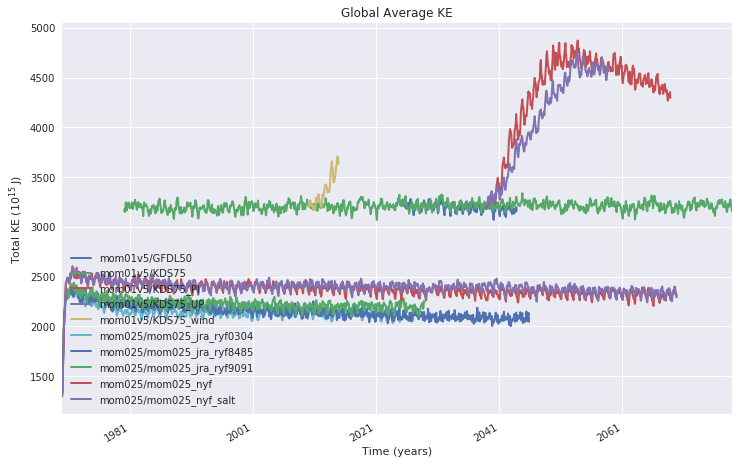

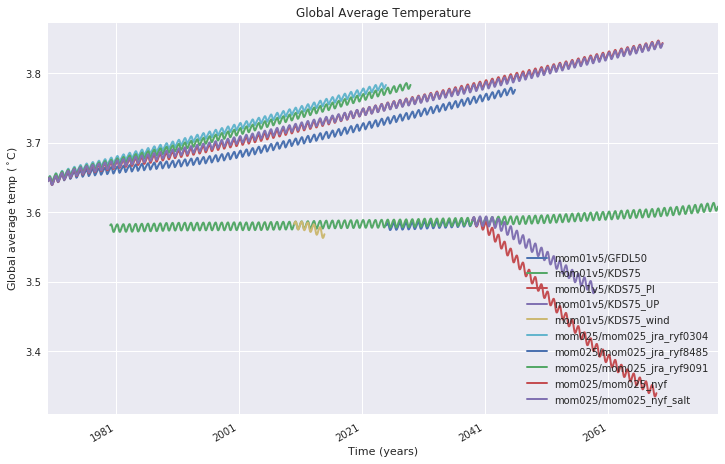

In [5]:
plt.figure(figsize=(12,8))
for expt in expts:
    scalar_quantities[expt].ke_tot.plot(label=expt, linewidth=2)

plt.legend(loc='lower left')
plt.ylabel('Total KE (10$^{15}$ J)')
plt.xlabel('Time (years)')
plt.title('Global Average KE')

plt.figure(figsize=(12,8))
for expt in expts:
    scalar_quantities[expt].temp_global_ave.plot(label=expt, linewidth=2)
    
plt.legend(loc='lower right')
plt.ylabel('Global average temp ($^\circ$C)')
plt.xlabel('Time (years)')
plt.title('Global Average Temperature')


### Interactive plots using Bokeh

In [20]:
from bokeh.io import show, output_notebook
from bokeh.layouts import column
from bokeh.plotting import figure
from bokeh.palettes import Category10
output_notebook()

Loading BokehJS ...

In [22]:
quantity = 'temp_global_ave'

p = figure(plot_width=800, plot_height=500, x_axis_type="datetime")

p.title.text = quantity + ' (Click on legend entries to hide lines)'

for expt, color in zip(expts, Category10[len(expts)]):

    df = scalar_quantities[expt]
    p.line(df.index, df[quantity], legend=expt,
          line_width=2, alpha=0.8, 
           color=color)    
p.legend.location = "bottom_left"
p.legend.click_policy="hide"

plots = column()
show(p)

In [8]:
import bokeh
bokeh.__version__

'0.12.5'